In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [2]:
#convert the vector to an image

def get_image(x):
  x = 0.5 * (x + 1)
  x = x.view(x.size(0), 28, 28)
  return x

In [3]:
CUDA = torch.cuda.is_available()

In [4]:
device = torch.device('cuda' if CUDA else 'cpu')
device

device(type='cuda')

In [27]:
#display routine
def display_image(in_, out, n = 1):
  for idx in range(n):
    if in_ is not None:
      input_img = get_image(in_.cpu().data)
      plt.figure(figsize = (18, 6))
      for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(input_img[i + 4*idx])
        plt.axis('off')
    out_img = get_image(out.cpu().data)   
    plt.figure(figsize = (18, 6))
    for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.imshow(out_img[i + 4*idx])
      plt.axis('off')

In [8]:
#data loading
batch_size = 256

img_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5, ), (0.5, ))
])

dataset = MNIST('./data', transform = img_transform, download = True)
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [7]:

# Define model architecture and reconstruction loss

# n = 28 x 28 = 784
d = 30  # for standard AE (under-complete hidden layer)

class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, d),
        nn.Tanh()
    )
    self.decoder = nn.Sequential(
        nn.Linear(d, 28 * 28),
        nn.Tanh()
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

model = AutoEncoder().to(device)
criterion = nn.MSELoss()      



In [9]:
#optims

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr = learning_rate
)

epochs: 1
loss:  0.07889587432146072
epochs: 2
loss:  0.06267915666103363
epochs: 3
loss:  0.06814775615930557
epochs: 4
loss:  0.0619812048971653
epochs: 5
loss:  0.060443215072155
epochs: 6
loss:  0.06288573890924454
epochs: 7
loss:  0.05933290347456932
epochs: 8
loss:  0.06343895941972733
epochs: 9
loss:  0.056590788066387177
epochs: 10
loss:  0.05048371106386185
epochs: 11
loss:  0.05637170001864433
epochs: 12
loss:  0.05665683001279831
epochs: 13
loss:  0.059717074036598206
epochs: 14
loss:  0.05646500363945961
epochs: 15
loss:  0.05226772651076317
epochs: 16
loss:  0.05348026379942894
epochs: 17
loss:  0.05190589651465416
epochs: 18
loss:  0.05471602454781532
epochs: 19
loss:  0.05003775283694267
epochs: 20
loss:  0.05718177929520607


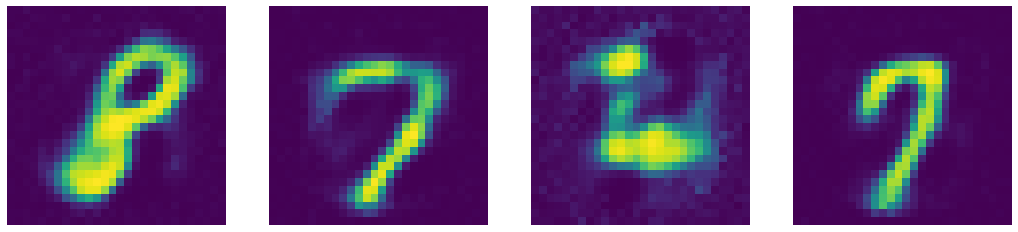

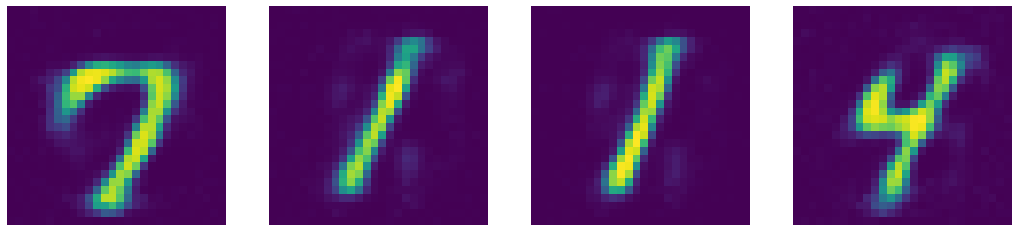

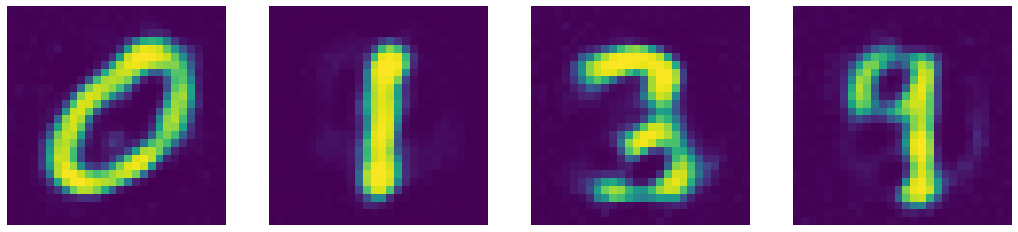

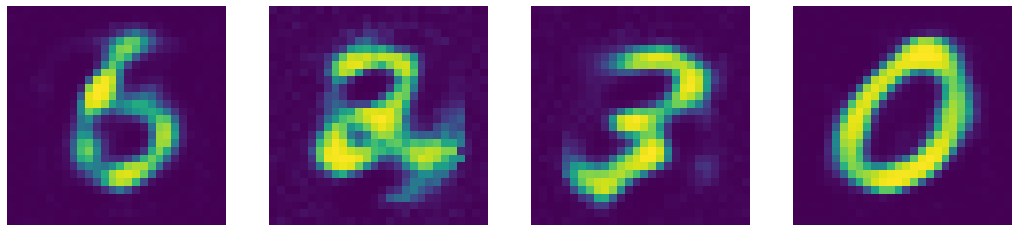

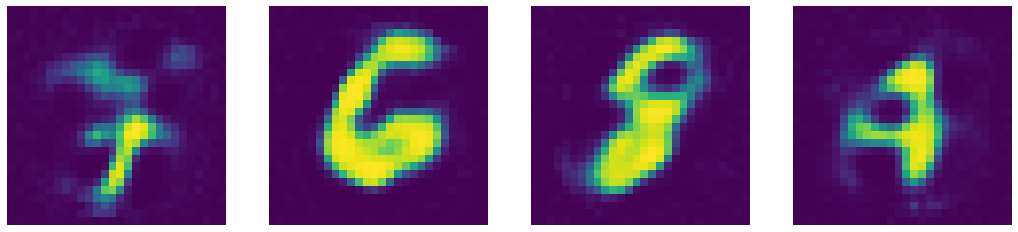

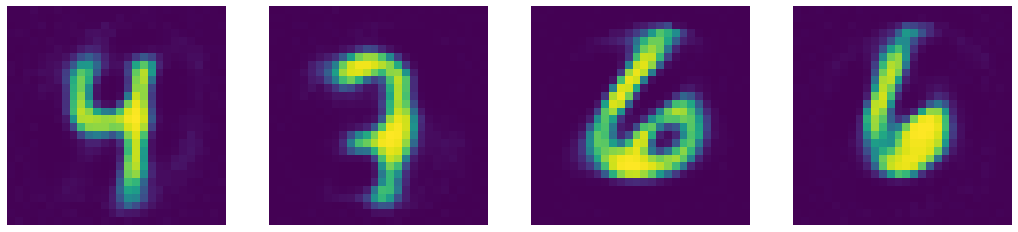

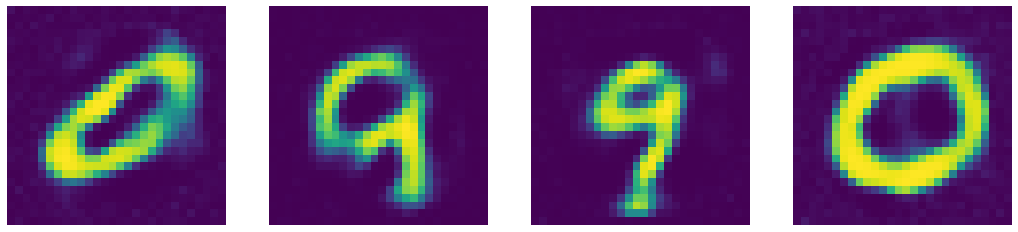

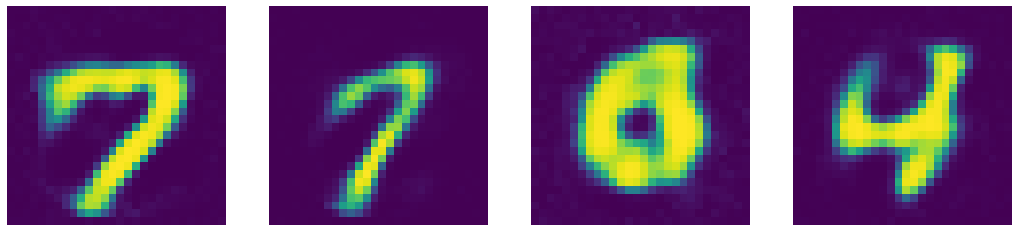

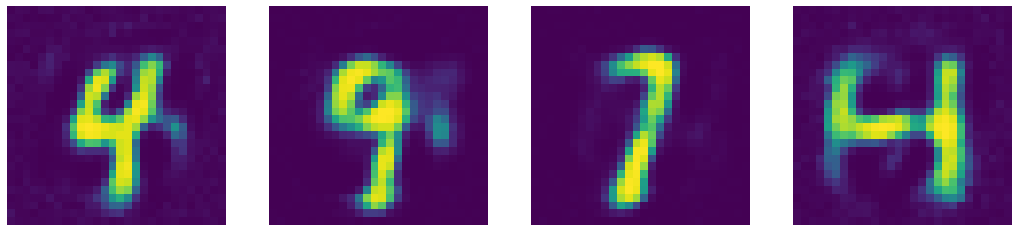

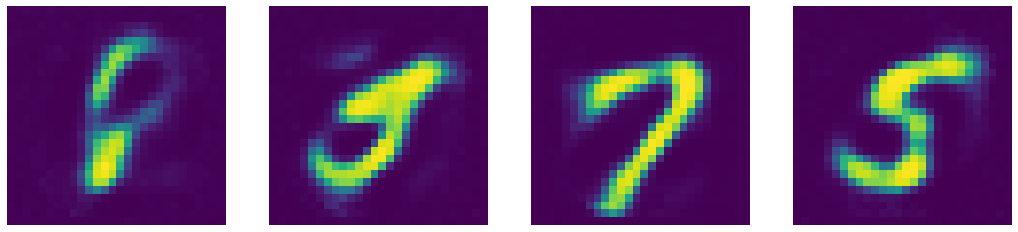

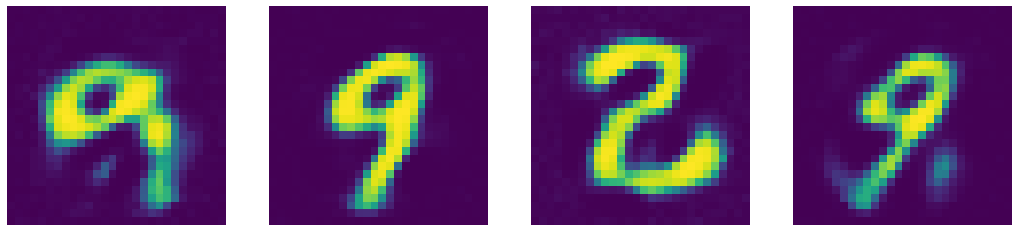

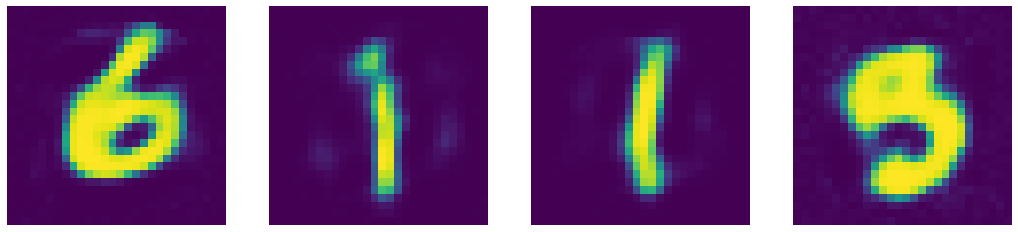

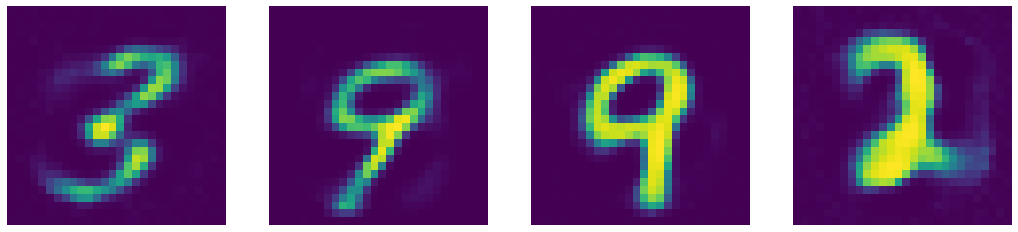

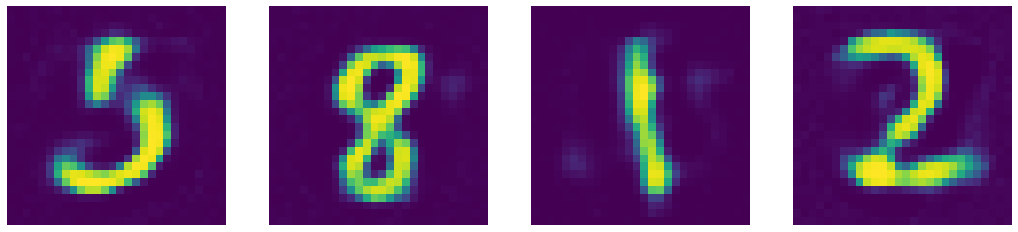

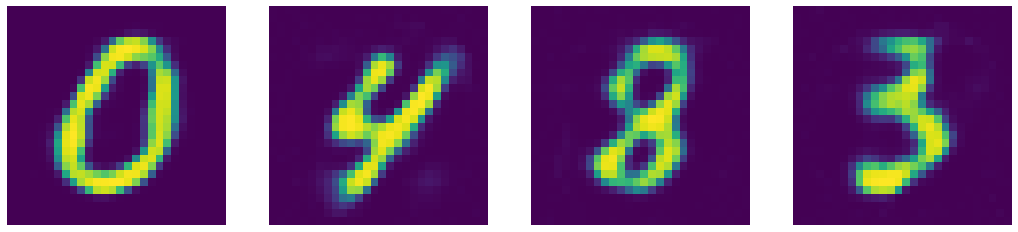

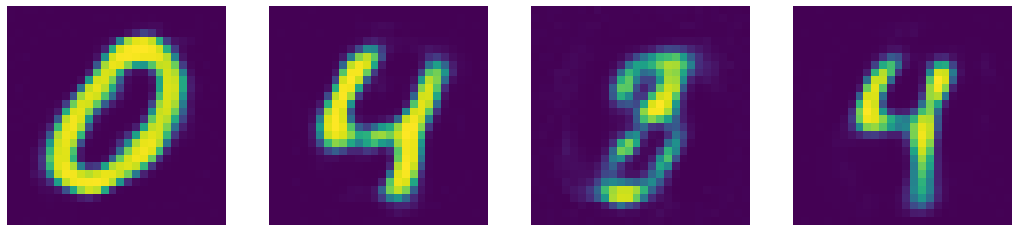

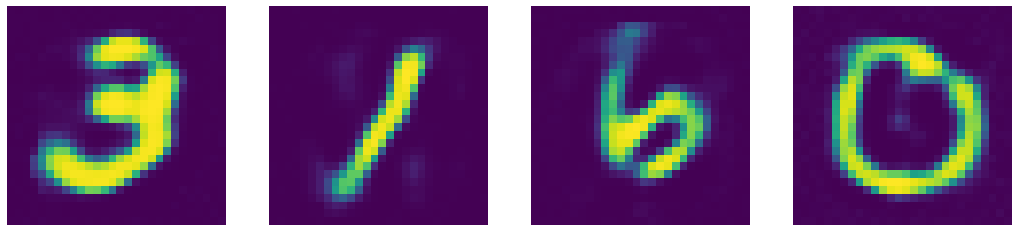

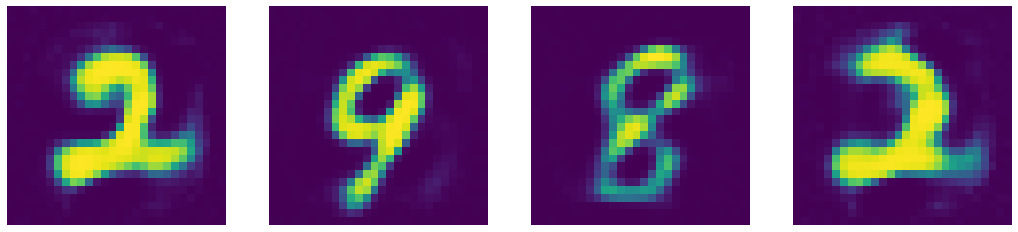

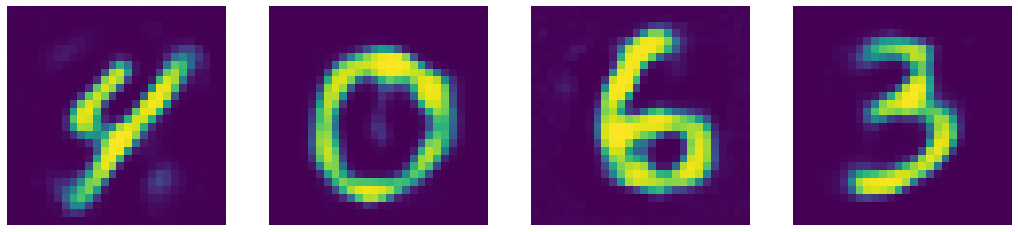

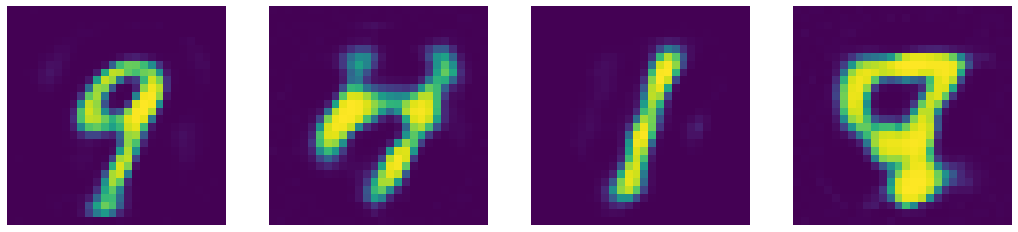

In [28]:
epochs = 20
for epoch in range(epochs):
  for data in dataloader:
    img, label = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    output = model(img)
    loss = criterion(output, img.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("epochs: {}".format(epoch + 1))
  print("loss: ", loss.item())
  display_image(None, output)